In [31]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:
mnist_dataset_train = MNIST('train', True, download=True)
mnist_dataset_test = MNIST('test', False, download=True)

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 5006274.29it/s]


Extracting train\MNIST\raw\train-images-idx3-ubyte.gz to train\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 4811172.21it/s]

Extracting train\MNIST\raw\train-labels-idx1-ubyte.gz to train\MNIST\raw




  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3297812.18it/s]


Extracting train\MNIST\raw\t10k-images-idx3-ubyte.gz to train\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting train\MNIST\raw\t10k-labels-idx1-ubyte.gz to train\MNIST\raw



  0%|                                                                                      | 0/9912422 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 6472444.94it/s]


Extracting test\MNIST\raw\train-images-idx3-ubyte.gz to test\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 1805596.95it/s]


Extracting test\MNIST\raw\train-labels-idx1-ubyte.gz to test\MNIST\raw



  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 4878051.31it/s]


Extracting test\MNIST\raw\t10k-images-idx3-ubyte.gz to test\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4510068.36it/s]

Extracting test\MNIST\raw\t10k-labels-idx1-ubyte.gz to test\MNIST\raw



In [3]:
 len(mnist_dataset_train), len(mnist_dataset_test)

(60000, 10000)

In [4]:
mnist_dataset_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1C64796EC10>, 5)

<ipython-input-5-67a5080ccd50>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


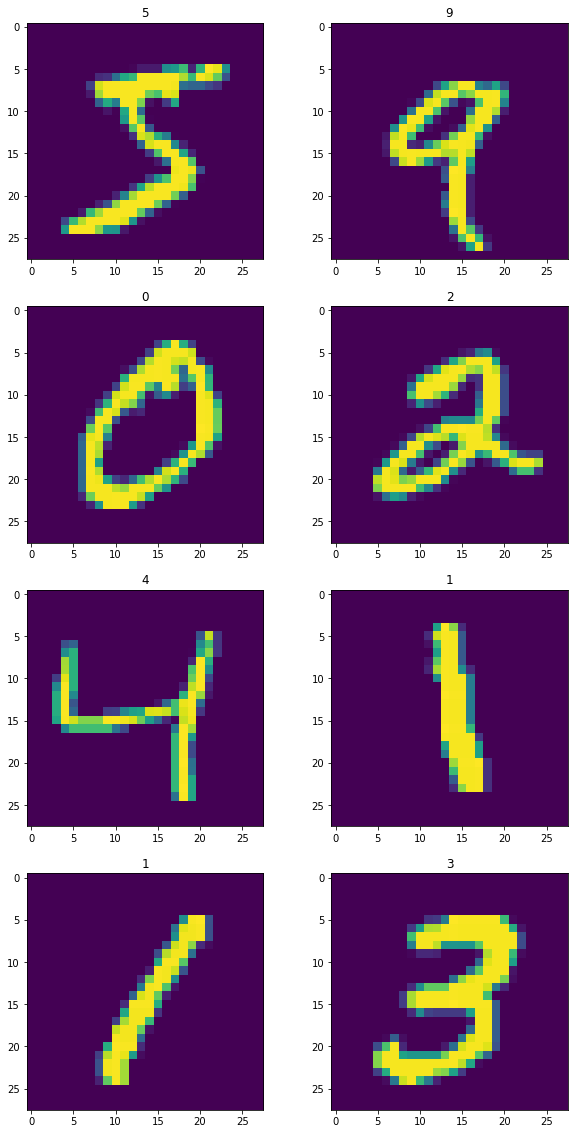

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for idx, (x, y) in enumerate(mnist_dataset_train):
    ax = axs[idx % 4][idx // 4]
    ax.imshow(x)
    ax.set_title(y)
    if idx == 7:
        break
fig.show()

In [6]:
np.array(mnist_dataset_train[0][0]).reshape(784).shape

(784,)

In [7]:
np.array([el[1] for el in mnist_dataset_train])

array([5, 0, 4, ..., 5, 6, 8])

In [8]:
X_train = np.array([np.array(el[0]).flatten() for el in mnist_dataset_train])
y_train = np.array([el[1] for el in mnist_dataset_train])
X_test = np.array([np.array(el[0]).flatten() for el in mnist_dataset_test])
y_test = np.array([el[1] for el in mnist_dataset_test])

In [9]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [10]:
from sklearn.linear_model import LogisticRegression

C:\Users\enjul\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train[:2000], y_train[:2000])

LogisticRegression(max_iter=10000)

In [12]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [13]:
accuracy_train = np.sum(y_train == y_pred_train)/len(y_train)
accuracy_test = np.sum(y_test == y_pred_test)/len(y_test)

print(f'{accuracy_train=}, {accuracy_test=}')

accuracy_train=0.8589, accuracy_test=0.8597


In [14]:
import torch
from torch import nn
from torch.nn import CrossEntropyLoss
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.optim import AdamW

from tqdm import tqdm

from IPython.display import clear_output

In [15]:
mnist_dataset_train = MNIST('train', True, download=True, transform=ToTensor())
mnist_dataset_test = MNIST('test', False, download=True, transform=ToTensor())

In [16]:
type(mnist_dataset_test[0][0]), type(mnist_dataset_test[0][1]), mnist_dataset_test[0][0].shape

(torch.Tensor, int, torch.Size([1, 28, 28]))

In [17]:
batch_size = 32
train_dataloader = DataLoader(mnist_dataset_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(mnist_dataset_test, batch_size=batch_size, shuffle=False)

In [18]:
for el in train_dataloader:
    print(len(el), el[0].shape, el[1])
    break

2 torch.Size([32, 1, 28, 28]) tensor([2, 8, 8, 5, 3, 9, 7, 4, 0, 9, 1, 0, 3, 8, 2, 4, 5, 6, 4, 4, 7, 4, 4, 3,
        7, 0, 9, 5, 2, 6, 6, 3])


In [19]:
el[0].max()

tensor(1.)

In [32]:
class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1) 
        self.fc1 = nn.Linear(4*4*50, 500)   
        self.dropout1 = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(500, 10)  
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = F.max_pool2d(x, 2, 2)  
        x = F.relu(self.conv2(x))  
        x = F.max_pool2d(x, 2, 2) 
        x = x.view(-1, 4*4*50)     
        x = F.relu(self.fc1(x))   
        x = self.dropout1(x)    
        x = self.fc2(x)        
        return x

In [33]:
model = Mnist()
x = torch.zeros(1, 1, 28, 28)
y = model(x)
y.shape

torch.Size([1, 10])

In [23]:
#model = Mnist()
#criterion = CrossEntropyLoss()
#optimizer = AdamW(model.parameters(), weight_decay=1e-1)

In [34]:
def train(model, criterion, optimizer, dataloader, max_num_batches=1000):
    total_loss = 0
    total_accuracy = 0
    model.train()
    for idx, batch in tqdm(enumerate(dataloader)):
        optimizer.zero_grad()
        x, y = batch[0], batch[1]
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += np.sum(np.argmax(pred.detach().numpy(), axis=1) == y.detach().numpy()) / len(batch[0])
        if idx == max_num_batches:
            break
    return total_loss / max_num_batches, total_accuracy / max_num_batches


In [35]:
def test(model, criterion, optimizer, dataloader):
    total_loss = 0
    total_accuracy = 0
    model.eval()
    with torch.no_grad():
        for idx, batch in tqdm(enumerate(dataloader)):
            x, y = batch[0], batch[1]
            with torch.no_grad():
                pred = model(x)
            loss = criterion(pred, y)
            total_loss += loss.item()
            total_accuracy += np.sum(np.argmax(pred.detach().numpy(), axis=1) == y.detach().numpy()) / len(batch[0])
    return total_loss / len(dataloader), total_accuracy / len(dataloader)

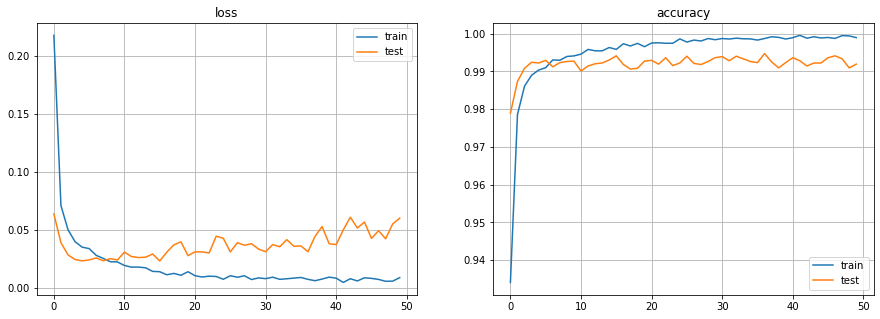

Best test accuracy = 0.9947084664536742


In [38]:
model = Mnist()
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters())

total_train_loss = []
total_test_loss = []
total_train_accuracy = []
total_test_accuracy = []

for epoch in range(50):
    train_loss, train_accuracy = train(model, criterion, optimizer, train_dataloader)
    test_loss, test_accuracy = test(model, criterion, optimizer, test_dataloader)

    total_train_loss.append(train_loss)
    total_test_loss.append(test_loss)
    total_train_accuracy.append(train_accuracy)
    total_test_accuracy.append(test_accuracy)

    clear_output(True)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].plot(total_train_loss, label='train')
    axs[0].plot(total_test_loss, label='test')
    axs[0].set_title('loss')
    axs[0].grid()
    axs[0].legend(loc='best')


    axs[1].plot(total_train_accuracy, label='train')
    axs[1].plot(total_test_accuracy, label='test')
    axs[1].set_title('accuracy')
    axs[1].grid()
    axs[1].legend(loc='best')

    plt.show()
    
print(f'Best test accuracy = {max(total_test_accuracy)}')

In [39]:
print(f"Кол-во параметров: {sum(p.numel() for p in model.parameters())}.")

Кол-во параметров: 431080.
